# NumPy Python

## Broadcasting

El broadcasting es un proceso de NumPyk que hace que funciones las operaciones aritméticas con objetos que no tienen necesariamente la misma dimensión. El array más pequeño se transmite a través del más granfe para que tengan formatos compatibles.

Para entenderlo mejor vamos a poner un ejemplo:

Tenemos una lista de datos, en NumPy se representaría como un array 2D. Donde cada fila representada es un dato. Supongamos que queremos aplicar un tipo de escala a todos los datos, por ejemplo, que cada dato se multiplique por un valor.

Solo para tener una comprensión clara: contemos las calorías compuestas de grasas (9 calorías por gramo), proteína (4 calorías por gramo) y carbohidratos (4 calorías por gramo). Entonces, si enumeramos algunos alimentos (tabla inferior), y para cada alimento enumeramos su desglose de macronutrientes (parámetros), podemos multiplicar cada nutriente por su valor calórico (aplicar escala -> 3,3,8) para calcular el desglose calórico de cada alimento.

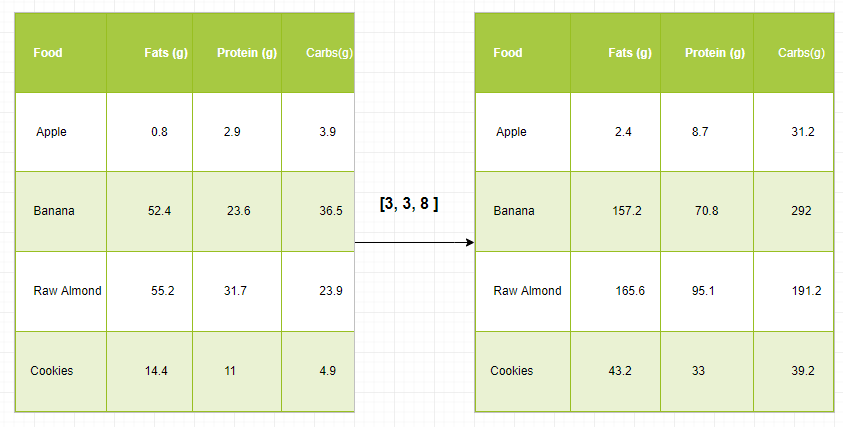

Con esta transformación, ahora podemmos calcular todo tipo tipo de información útil. Por ejemplo, cuál es el número total de calorías presentes en algún alimento, saber cuántas calorias obtenemos de las proteínas, etc...

In [ ]:
import numpy as np

In [ ]:
tabla = np.array([
[0.8, 2.9, 3.9],
[52.4, 23.6, 36.5],
[55.2, 31.7, 23.9],
[14.4, 11, 4.9]
])

# Create a new array filled with zeros,
# of the same shape as macros.
resultado = np.zeros_like(tabla)

escala = np.array([3, 3, 8])

# Now multiply each row of macros by
# cal_per_macro. In Numpy, `*` is
# element-wise multiplication between two arrays.
for i in range(tabla.shape[0]):
	resultado[i, :] = tabla[i, :] * escala

resultado


## Reglas transmisión

la transmisión de dos arrays sigue unas reglas:

- Si las dos matrices difieren en el número de dimensiones, la forma de la que tiene menos dimensiones se rellena con unos en su lado inicial (izquierdo)

- Si la forma de las dos matrices no coincide en ninguna dimensión, la matriz con forma igual a 1 en esa dimensión se estira para que coincida con la otra forma

- Si en alguna dimensión los tamaños no están de acuerdo y ninguno es igual a 1, se genera un error.

In [ ]:
# Ejemplo con array 1D 
vector = np.array([32, 1, 14])
n = 5
resultado = vector + n
resultado 


In [ ]:
# Ejemplo con array 2D
array = np.array([[5, 90, 22], [432, 32, 17]])
n = 25
resultado = array + n 
resultado

### Ejemplo 1

Transmision de una matriz 1D y una matriz 2D

In [ ]:
matriz_2d = np.ones((2,3))
matriz_1d = np.arange((3))

Asi se veran las matrices

In [ ]:
matriz_1d

In [ ]:
matriz_2d

Consideremos una operación en estas dos matrices. La forma de las matrices son:

matriz_2d.shape = (2, 3)
matriz_1d.shape = (3,)

Vemos por la regla 1 que la matriz_1d tiene menos dimensiones, por lo que la rellenamos a la izquierda con unos:

matriz_2d.shape -> (2, 3)
matriz_1d.shape -> (1, 3)

Por la regla 2, ahora vemos que la primera dimensión no está de acuerdo, por lo que estiramos esta dimensión para que coincida:

matriz_2d.shape -> (2, 3)
matriz_1d .shape -> (2, 3)

Las formas coinciden, y vemos que la forma final será (2, 3):

In [ ]:
matriz_1d + matriz_2d

### Ejemplo 2: 

Ejemplo donde cada matriz se debe transmitir


In [ ]:
matriz_1 = np.arange((3)).reshape((3,1))
matriz_2 = np.arange((3))

Asi se ven las matrices: 

In [ ]:
matriz_1

In [ ]:
matriz_2

Nuevamente, comenzaremos escribiendo la forma de las matrices:

matriz_1.shape = (3, 1)
matriz_2.shape = (3,)

La regla 1 dice que debemos rellenar la forma de matriz_2 con unos:

matriz_1.shape -> (3, 1)
matriz_2.shape -> (1, 3)

Y la regla 2 nos dice que actualizamos cada uno de estos para que coincida con el tamaño correspondiente de la otra matriz:

matriz_1.shape -> (3, 3)
matriz_2.shape -> (3, 3)

Debido a que el resultado coincide, estas formas son compatibles. Esto lo podemos ver aquí:

In [ ]:
matriz_1 + matriz_2

### Ejemplo 3

En este ejemplo veremos dos matrices que no son compatibles: 

In [ ]:
matriz_1 = np.ones((3,2))
matriz_2 = np.arange((3))

Esta es solo una situación ligeramente diferente a la del primer ejemplo: la matriz matriz_1 se transpone. ¿Cómo afecta esto al cálculo? La forma de las matrices son

matriz_1.shape = (3, 2)
matriz_2.shape = (3,)

De nuevo, la regla 1 nos dice que debemos rellenar la forma de matriz_2 con unos:

matriz_1.shape -> (3, 2)
matriz_2.shape -> (1, 3)

Por la regla 2, la primera dimensión de ase estira para que coincida con la de matriz_1:

matriz_1.shape -> (3, 2)
matriz_2.shape -> (3, 3)

Ahora llegamos a la regla 3: las formas finales no coinciden, por lo que estas dos matrices son incompatibles, como podemos observar al intentar esta operación:

In [ ]:
matriz_1 + matriz_2